<a href="https://colab.research.google.com/github/srita2003/ML_Practicals/blob/main/Bonus_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
# Handle missing values
X.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [18]:
k_values = [3, 5, 7]
results = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({"k": k, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2})
    print(f"k = {k}: MAE = {mae:.3f}, MSE = {mse:.3f}, RMSE = {rmse:.3f}, R² = {r2:.3f}")

k = 3: MAE = 0.460, MSE = 0.467, RMSE = 0.683, R² = 0.644
k = 5: MAE = 0.446, MSE = 0.432, RMSE = 0.658, R² = 0.670
k = 7: MAE = 0.444, MSE = 0.428, RMSE = 0.654, R² = 0.673


In [19]:
results_df = pd.DataFrame(results)

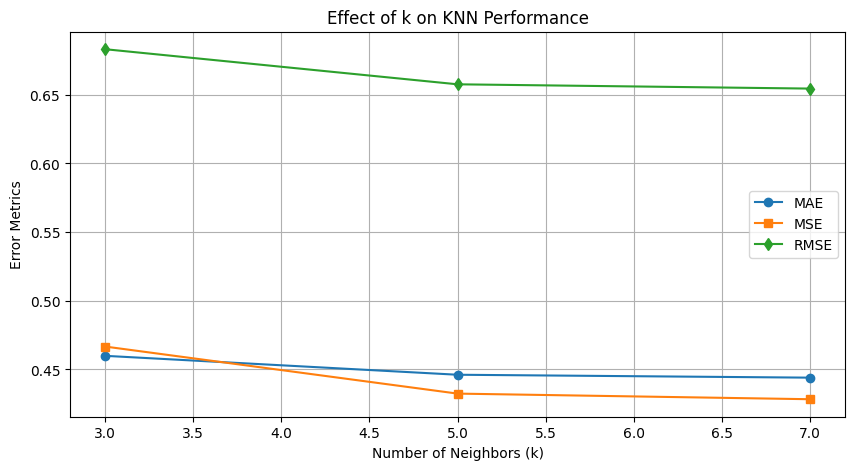

In [21]:
# Plot k vs model performance
plt.figure(figsize=(10,5))
plt.plot(results_df['k'], results_df['MAE'], marker='o', label='MAE')
plt.plot(results_df['k'], results_df['MSE'], marker='s', label='MSE')
plt.plot(results_df['k'], results_df['RMSE'], marker='d', label='RMSE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Metrics')
plt.title('Effect of k on KNN Performance')
plt.legend()
plt.grid()
plt.show()

In [24]:
# Train and evaluate Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [25]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression: MAE = {mae_lr:.3f}, MSE = {mse_lr:.3f}, RMSE = {rmse_lr:.3f}, R² = {r2_lr:.3f}")

Linear Regression: MAE = 0.533, MSE = 0.556, RMSE = 0.746, R² = 0.576


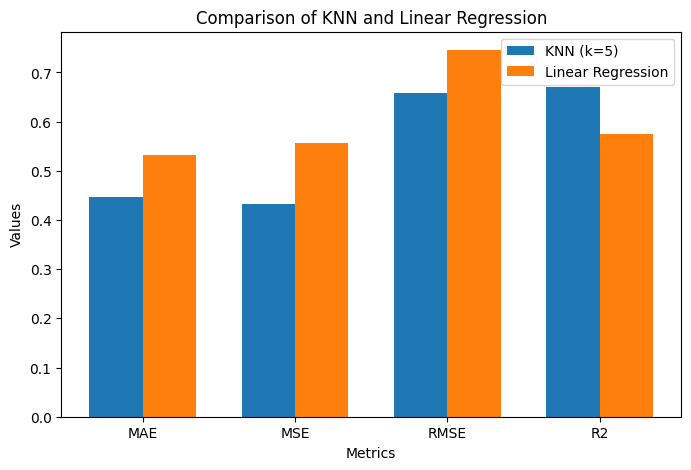

In [28]:
# Compare performance
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
knn_performance = [results_df.loc[results_df['k'] == 5, metric].values[0] for metric in metrics]
lr_performance = [mae_lr, mse_lr, rmse_lr, r2_lr]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, knn_performance, width, label='KNN (k=5)')
rects2 = ax.bar(x + width/2, lr_performance, width, label='Linear Regression')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of KNN and Linear Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.show()
